In [2]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['font.family']='Malgun Gothic'  #한글설정
matplotlib.rcParams['font.size']= 10  #글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
# [ 도미 ]
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0,
33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
# [ 빙어 ]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


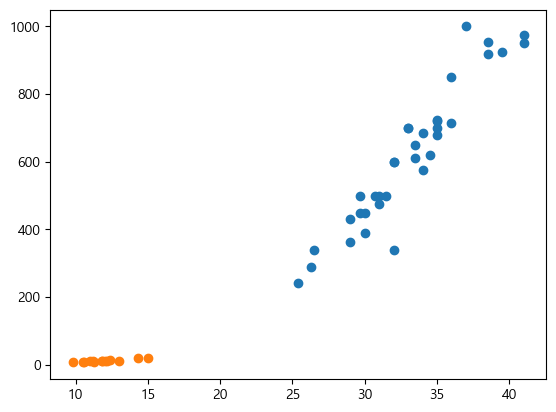

In [4]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)

In [5]:
length = bream_length+smelt_length
weight = bream_weight+smelt_weight 
results=[1]*35+[0]*14

In [6]:
len(length)               #49
len(bream_length)         #35
len(smelt_weight)         #14

14

In [7]:
#DataFrame
data=[
    length,
    weight,
    results  
]
df = pd.DataFrame(data)
df = df.T
df

,0,1,2
0,25.4,242.0,1.0
1,26.3,290.0,1.0
2,26.5,340.0,1.0
3,29.0,363.0,1.0
4,29.0,430.0,1.0
5,29.7,450.0,1.0
6,29.7,500.0,1.0
7,30.0,390.0,1.0
8,30.0,450.0,1.0
9,30.7,500.0,1.0


In [8]:
#length,weight,results
#[]

# [ 도미 ]
# bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0,
# 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
# bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
# 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
# # [ 빙어 ]
# smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
# smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# [[25.4,242.0],[26.3,290.0],...]

#2개 리스트를 1개로 묶는 작업
datas=[[l,w] for l, w in zip(length,weight)]
#datas
# results


In [9]:
#DataFrame 생성
df=pd.DataFrame(datas)
# df

In [10]:
# 데이터 shuffle -idx 리스트 1개 생성
idx=[i for i in range(49)]
random.shuffle(idx)
#idx

In [11]:
#35개 데이터를 분리
train_input = [datas[i] for i in idx[:35]]
test_input = [datas[i] for i in idx[35:]]
train_target=[results[i] for i in idx[:35]]
test_target=[results[i] for i in idx[35:]]

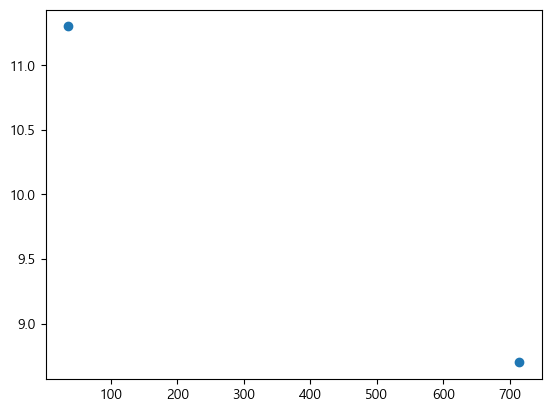

In [12]:
plt.scatter(train_input[0],train_input[1])

In [16]:
test_target

[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1]

머신러닝 구현

In [37]:
#1. 데이터 전처리 - Nan, 0 타입, 표준화 작업, 훈련세트, 테스트세트 구성
#2. 데이터 학습시키기
clf= KNeighborsClassifier()
clf.fit(train_input,train_target)

#3. 데이터 예측하기
predict=clf.predict(test_input)
predict
#4. 정확도 측정
score=clf.score(test_input,test_target)
print("정답률:  ",score)

정답률:   1.0


In [41]:
#실험 데이터로 확인 
predict = clf.predict([[30,600]])
print("판별: ",predict)

판별:  [1]
